<a href="https://colab.research.google.com/github/Muhirwakyeyune/GDA_Live_coding_FML23/blob/class/minibatchGradientdescent34.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

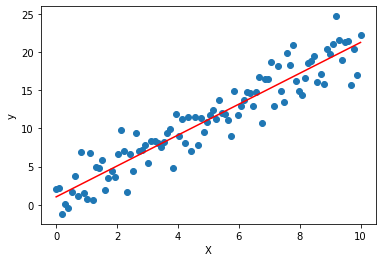

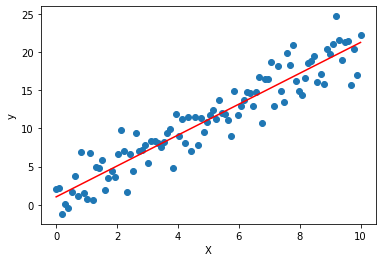

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class LinearRegression:
    def __init__(self, alpha=0.01, n_iter=100, batch_size=32):
        self.alpha = alpha
        self.n_iter = n_iter
        self.batch_size = batch_size
        self.theta = None
    
    def fit(self, X, y):
        # Add intercept term to X
        X = np.insert(X, 0, 1, axis=1)
        
        # Initialize theta to zeros
        self.theta = np.zeros(X.shape[1])
        
        # Perform mini-batch gradient descent
        n_samples = len(y)
        for i in range(self.n_iter):
            # Shuffle data
            idx = np.random.permutation(n_samples)
            X, y = X[idx], y[idx]
            
            # Loop over mini-batches
            for j in range(0, n_samples, self.batch_size):
                # Select mini-batch
                X_batch = X[j:j+self.batch_size]
                y_batch = y[j:j+self.batch_size]
                
                # Calculate gradient of MSE with respect to theta for mini-batch
                grad = (X_batch.dot(self.theta) - y_batch).T.dot(X_batch)
                
                # Update theta
                self.theta -= self.alpha * grad / len(y_batch)
        
    def predict(self, X):
        # Add intercept term to X
        X = np.insert(X, 0, 1, axis=1)
        
        # Calculate predictions
        y_pred = X.dot(self.theta)
        return y_pred
    
    def plot(self, X, y):
        # Plot data
        plt.scatter(X, y)
        
        # Add predictions to plot
        X_plot = np.linspace(X.min(), X.max(), 100)
        X_plot_with_intercept = np.insert(X_plot.reshape(-1, 1), 0, 1, axis=1)
        y_plot = X_plot_with_intercept.dot(self.theta)
        plt.plot(X_plot, y_plot, color='r')
        
        # Set axis labels
        plt.xlabel('X')
        plt.ylabel('y')
        
        # Show plot
        plt.show()
# Generate synthetic data
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 2*X[:, 0] + 1 + np.random.randn(100)*2

# Fit linear regression model
model = LinearRegression(alpha=0.01, n_iter=1000, batch_size=16)
model.fit(X, y)

# Plot results
model.plot(X, y)
